In [26]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.image as mpimg
import matplotlib.patches as patches

from matplotlib.patches import Rectangle

#from PIL import Image

from scipy import ndimage
import copy

In [93]:
bin_size = 1000

img_mp = np.ndarray([bin_size], dtype=np.ndarray)
img_ob = np.ndarray([bin_size], dtype=np.ndarray)
img_sum = np.zeros([bin_size])
img_int = np.zeros([bin_size])

In [94]:
#fix = np.random.randint(0,100,size=20**2).reshape(20,20)

obj_shape = 'H'
#obj_shape = 'Sq'

for i in range(bin_size):
    img_mp[i] = np.random.randint(0,100,size=20**2).reshape(20,20)
    img_ob[i] = copy.deepcopy(img_mp[i])
    if obj_shape == 'Sq':
        img_ob[i][5:-5, 5:-5] = 0 # block square
    elif obj_shape == 'H':
        img_ob[i][5:-5, 5] = 0 # H
        img_ob[i][5:-5, -5] = 0 # H
        img_ob[i][10, 5:-5] = 0 # H
    img_sum[i] = np.sum(img_ob[i])
    img_int[i] = np.sum(img_mp[i])
    
bucket_avg = np.mean(img_sum)
int_avg = np.mean(img_int)

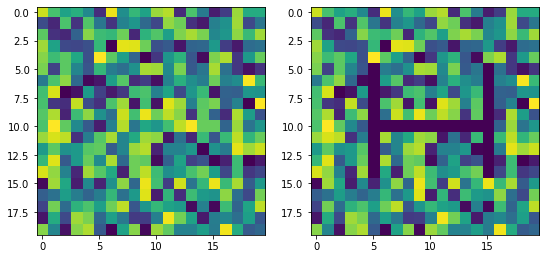

In [95]:
fig, (ax1, ax2) = plt.subplots(ncols=2,nrows=1, figsize=(9, 4.5))
_=ax1.imshow(img_mp[0])
_=ax2.imshow(img_ob[0])

#plt.savefig('./images/no_obj.png', format='png')
plt.savefig(f'./images/obj_{obj_shape}.png', format='png')

In [80]:
ghost = np.zeros([20,20])

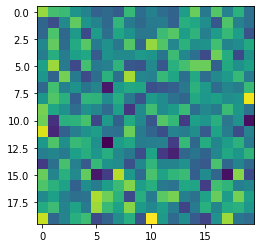

In [81]:
# Default second order GI

for i in range(ghost.shape[0]):
    for j in range(ghost.shape[1]):
        sum = 0

        for bin in range(bin_size):
            sum += (img_sum[bin])*img_mp[bin][i][j]
            #print(sum)
            #print(type(img_sum[bin]))
            #print(type(img_mp[bin]))


        ghost[i,j]=sum/bin_size  
        
plt.imshow(ghost)
plt.savefig(f'./images/GI_traditional_{obj_shape}_p{bin_size}.png', format='png')

In [82]:
print(bucket_avg)

14848.5612


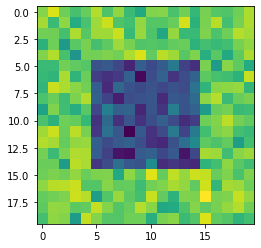

In [83]:
for i in range(ghost.shape[0]):
    for j in range(ghost.shape[1]):
        sum = 0

        for bin in range(bin_size):
            sum += (img_sum[bin] - bucket_avg)*img_mp[bin][i][j]
            #print(sum)
            #print(type(img_sum[bin]))
            #print(type(img_mp[bin]))


        ghost[i,j]=sum/bin_size    
        
plt.imshow(ghost)
plt.savefig(f'./images/GI_subtracted_{obj_shape}_p{bin_size}.png', format='png')

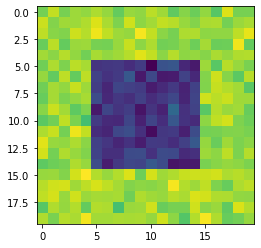

In [84]:
# Differential GI

for i in range(ghost.shape[0]):
    for j in range(ghost.shape[1]):
        sum = 0

        for bin in range(bin_size):
            sum += (img_sum[bin] - bucket_avg*img_int[bin]/int_avg)*img_mp[bin][i][j]

        ghost[i,j]=sum/bin_size    
        
plt.imshow(ghost)
plt.savefig(f'./images/GI_differential_{obj_shape}_p{bin_size}.png', format='png')

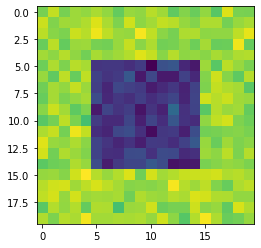

In [85]:
# Normalized GI

for i in range(ghost.shape[0]):
    for j in range(ghost.shape[1]):
        sum = 0

        for bin in range(bin_size):
            sum += (img_sum[bin]/img_int[bin] - bucket_avg/int_avg)*img_mp[bin][i][j]

        ghost[i,j]=sum/bin_size    
        
plt.imshow(ghost)
#print(ghost[10,:])
plt.savefig(f'./images/GI_normalized_{obj_shape}_p{bin_size}.png', format='png')

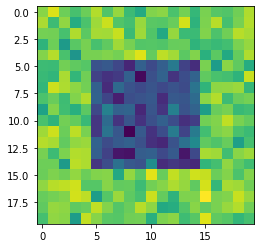

In [86]:
# Logarithmic GI

for i in range(ghost.shape[0]):
    for j in range(ghost.shape[1]):
        sum = 0

        for bin in range(bin_size):
            sum += np.log(img_sum[bin]/bucket_avg)*img_mp[bin][i][j]

        ghost[i,j]=sum/bin_size    
        
plt.imshow(ghost)
plt.savefig(f'./images/GI_logarithmic_{obj_shape}_p{bin_size}.png', format='png')

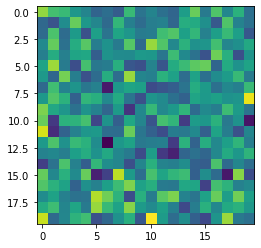

In [87]:
# Exponential GI

for i in range(ghost.shape[0]):
    for j in range(ghost.shape[1]):
        sum = 0

        for bin in range(bin_size):
            sum += 10**(img_sum[bin]/img_int[bin])*img_mp[bin][i][j]

        ghost[i,j]=sum/bin_size    
        
plt.imshow(ghost)
plt.savefig(f'./images/GI_exponential_{obj_shape}_p{bin_size}.png', format='png')